[📄 Download lecture notes (PDF)](Lecture2_notes.pdf)

# Data preprocessing

## Import the relevant libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Load the raw data

In [ ]:
#raw_data = pd.read_excel('cheese_taste.xlsx')
url = "https://raw.githubusercontent.com/yongxinlyu/CEIC6789/main/Lectures/lecture_2/cheese_taste.xlsx"
raw_data = pd.read_excel(url)
raw_data

,Sample,Acetic,Animal,H2S,Lactic,Taste
0,1,4.543,sheep,3.135,0.86,12.30
1,2,5.159,sheep,5.043,1.53,20.90
2,3,5.366,cow,5.438,1.57,39.00
3,4,5.759,sheep,7.496,1.81,47.90
4,5,4.663,cow,3.807,0.99,5.60
5,6,5.697,goat,7.601,1.09,25.90
6,7,5.892,cow,8.726,1.29,37.30
7,8,6.078,cow,7.966,1.78,21.90
8,9,4.898,sheep,3.850,1.29,18.10
9,10,5.242,sheep,4.174,1.58,21.00


## Explore the descriptive statistics of the variables

In [5]:
raw_data.describe(include='all')

,Sample,Acetic,Animal,H2S,Lactic,Taste
count,30.000000,30.000000,28,30.000000,27.000000,30.000000
unique,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,sheep,NaN,NaN,NaN
freq,NaN,NaN,12,NaN,NaN,NaN
mean,15.500000,6.025033,NaN,5.941767,1.477037,24.533667
std,8.803408,2.182611,NaN,2.126879,0.298455,16.256065
min,1.000000,4.477000,NaN,2.996000,0.860000,0.700000
25%,8.250000,5.237500,NaN,3.977500,1.290000,13.550000
50%,15.500000,5.446500,NaN,5.329000,1.490000,20.950000
75%,22.750000,6.031500,NaN,7.574750,1.700000,36.700000


## Determine the variables of interest to us

In [4]:
data_interest = raw_data.drop(['Sample'], axis=1)
data_interest.describe(include='all')

,Acetic,Animal,H2S,Lactic,Taste
count,30.000000,28,30.000000,27.000000,30.000000
unique,NaN,3,NaN,NaN,NaN
top,NaN,sheep,NaN,NaN,NaN
freq,NaN,12,NaN,NaN,NaN
mean,6.025033,NaN,5.941767,1.477037,24.533667
std,2.182611,NaN,2.126879,0.298455,16.256065
min,4.477000,NaN,2.996000,0.860000,0.700000
25%,5.237500,NaN,3.977500,1.290000,13.550000
50%,5.446500,NaN,5.329000,1.490000,20.950000
75%,6.031500,NaN,7.574750,1.700000,36.700000


## Deal with missing values

In [5]:
data_interest.isnull().sum()

Acetic    0
Animal    2
H2S       0
Lactic    3
Taste     0
dtype: int64

### Method 1: Remove observations

In [6]:
data_no_mv_m1 = data_interest.dropna(axis=0)
data_no_mv_m1.describe(include='all')

,Acetic,Animal,H2S,Lactic,Taste
count,25.000000,25,25.00000,25.000000,25.000000
unique,NaN,3,NaN,NaN,NaN
top,NaN,sheep,NaN,NaN,NaN
freq,NaN,11,NaN,NaN,NaN
mean,6.213360,NaN,6.02320,1.454800,24.464400
std,2.334872,NaN,2.10981,0.291449,15.520635
min,4.543000,NaN,3.13500,0.860000,0.700000
25%,5.247000,NaN,4.17400,1.290000,13.400000
50%,5.697000,NaN,5.43800,1.460000,21.000000
75%,6.078000,NaN,7.60100,1.680000,34.900000


A rule of thumb is that if you are removing < 5% of the observations, this method could be applied. But be cautious, if you are dealing with smallish data sets, you might simply waste data this way.

### Method 2: Impute the missing values with mean or median (Applicable to numerical variables)

From wikipedia: In statistics, imputation is the process of replacing missing data with substituted values.

In [7]:
data_no_mv_m2 = data_interest.copy()

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy='mean')
lactic = data_interest['Lactic'].values.reshape(-1,1)
data_no_mv_m2['Lactic'] = imp.fit_transform(lactic).flatten()
data_no_mv_m2


,Acetic,Animal,H2S,Lactic,Taste
0,4.543,sheep,3.135,0.860000,12.30
1,5.159,sheep,5.043,1.530000,20.90
2,5.366,cow,5.438,1.570000,39.00
3,5.759,sheep,7.496,1.810000,47.90
4,4.663,cow,3.807,0.990000,5.60
5,5.697,goat,7.601,1.090000,25.90
6,5.892,cow,8.726,1.290000,37.30
7,6.078,cow,7.966,1.780000,21.90
8,4.898,sheep,3.850,1.290000,18.10
9,5.242,sheep,4.174,1.580000,21.00


### Method 3: Impute the missing values using interpolation (Applicable to numerical variables)

Activity: Now that you understand how imputation is done, look up the internet and write a piece of code to carry out imputation using the interpolation method.

In this method, rather than using the mean or median values to fill up missing values, interpolated values are used. This can be useful sometimes for improving prediction.

This page gives you a nice overview of other Imputation methods: https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

### Method 4: Impute using the most frequent values (Applicable to categorical variables)

In [8]:
data_no_mv_m4 = data_no_mv_m2.copy()
mf_animal = data_no_mv_m2['Animal'].value_counts().index[0]
data_no_mv_m4['Animal'].fillna(mf_animal, inplace=True)
data_no_mv_m4

/var/folders/tn/23sfm0zs5f725m1tjsjgv1tc0000gn/T/ipykernel_36689/1543214328.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_no_mv_m4['Animal'].fillna(mf_animal, inplace=True)


,Acetic,Animal,H2S,Lactic,Taste
0,4.543,sheep,3.135,0.860000,12.30
1,5.159,sheep,5.043,1.530000,20.90
2,5.366,cow,5.438,1.570000,39.00
3,5.759,sheep,7.496,1.810000,47.90
4,4.663,cow,3.807,0.990000,5.60
5,5.697,goat,7.601,1.090000,25.90
6,5.892,cow,8.726,1.290000,37.30
7,6.078,cow,7.966,1.780000,21.90
8,4.898,sheep,3.850,1.290000,18.10
9,5.242,sheep,4.174,1.580000,21.00


## Deal with outliers

In [9]:
data_no_mv = data_no_mv_m4.copy()

### Explore the probability distribution functions

/var/folders/tn/23sfm0zs5f725m1tjsjgv1tc0000gn/T/ipykernel_36689/1051526947.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Acetic'])


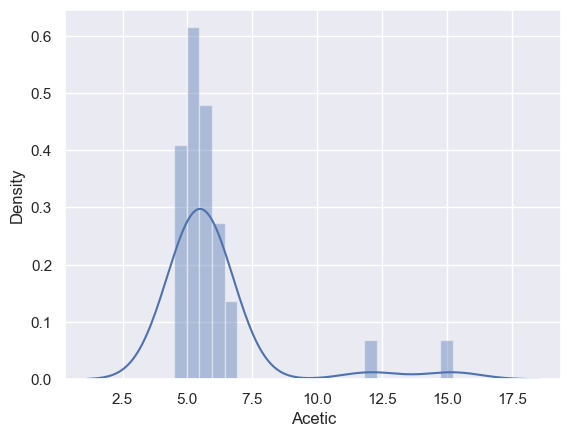

In [51]:
sns.distplot(data_no_mv['Acetic'])
plt.show()

/var/folders/tn/23sfm0zs5f725m1tjsjgv1tc0000gn/T/ipykernel_36689/4228857375.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['H2S'])


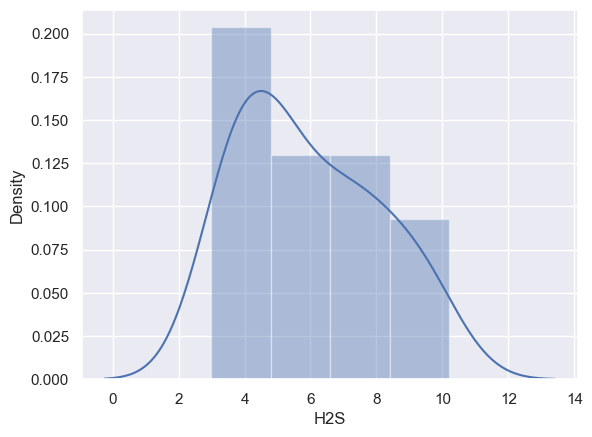

In [52]:
sns.distplot(data_no_mv['H2S'])
plt.show()

/var/folders/tn/23sfm0zs5f725m1tjsjgv1tc0000gn/T/ipykernel_36689/3527281904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Lactic'])


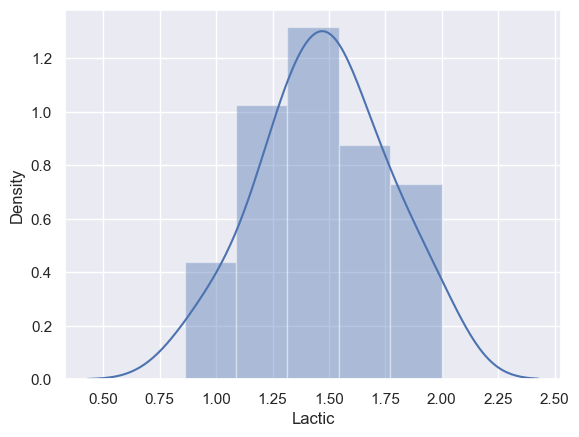

In [53]:
sns.distplot(data_no_mv['Lactic'])
plt.show()

/var/folders/tn/23sfm0zs5f725m1tjsjgv1tc0000gn/T/ipykernel_36689/862876312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Taste'])


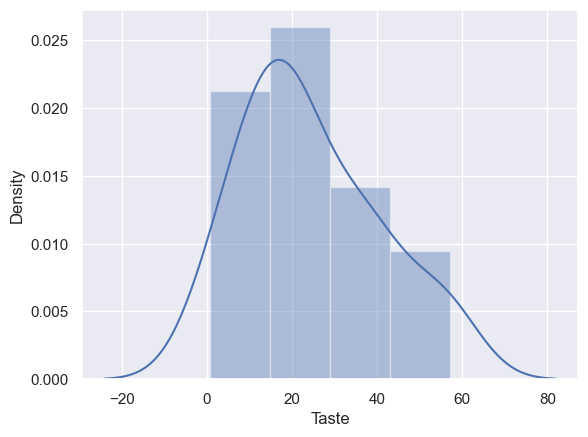

In [54]:
sns.distplot(data_no_mv['Taste'])
plt.show()

### Method 1: Remove values above (or below) a certain quantile

In [41]:
q = data_no_mv['Acetic'].quantile(0.96)
data_no_ol_m1 = data_no_mv[data_no_mv['Acetic'] < q]

/var/folders/tn/23sfm0zs5f725m1tjsjgv1tc0000gn/T/ipykernel_36689/3229253560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_ol_m1['Acetic'])


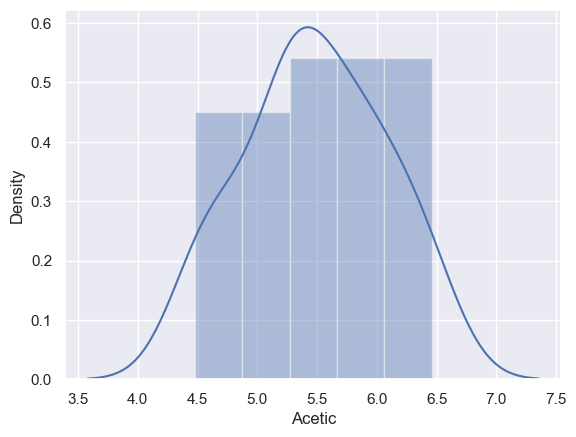

In [42]:
sns.distplot(data_no_ol_m1['Acetic'])
plt.show()

### Draw box plots

Detailed information about box plots: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

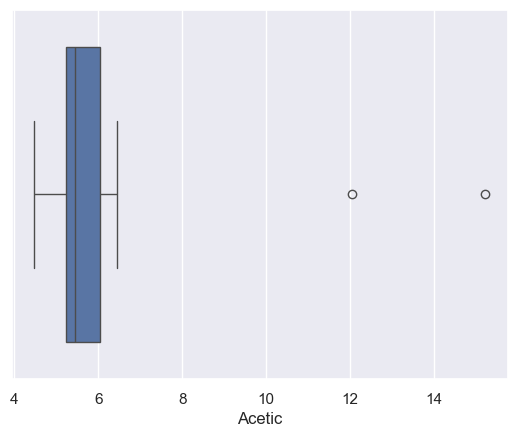

In [44]:
sns.boxplot(x=data_no_mv['Acetic'])
plt.show()

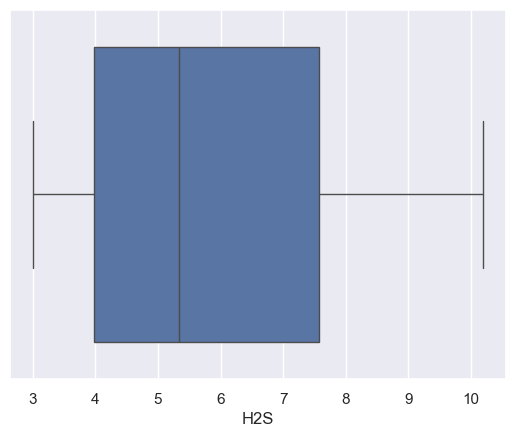

In [45]:
sns.boxplot(x=data_no_mv['H2S'])
plt.show()

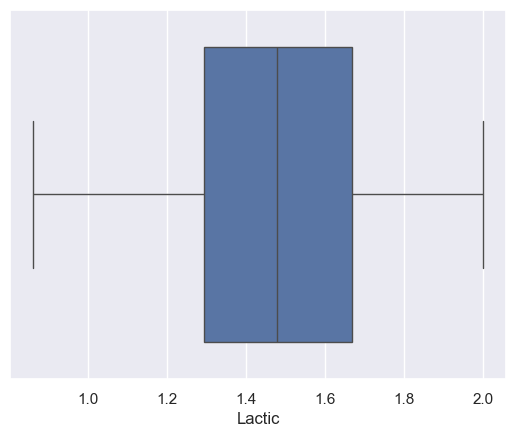

In [46]:
sns.boxplot(x=data_no_mv['Lactic'])
plt.show()

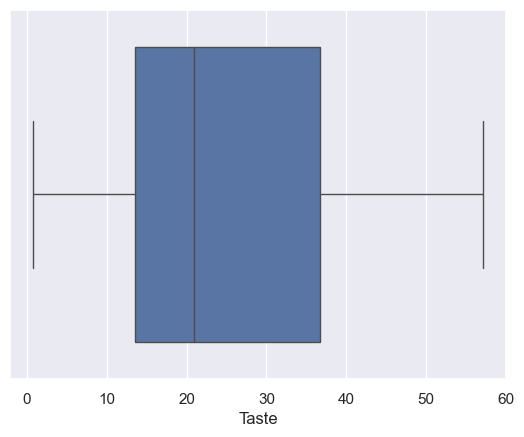

In [47]:
sns.boxplot(x=data_no_mv['Taste'])
plt.show()

### Method 2: Remove values using the Interquartile rule

In [48]:
q1 = data_no_mv['Acetic'].quantile(0.25)
q3 = data_no_mv['Acetic'].quantile(0.75)

ll = q1 - (q3-q1)*1.5
ul = q3 + (q3-q1)*1.5

data_no_ol_m2 = data_no_mv[data_no_mv['Acetic'].between(ll,ul)]

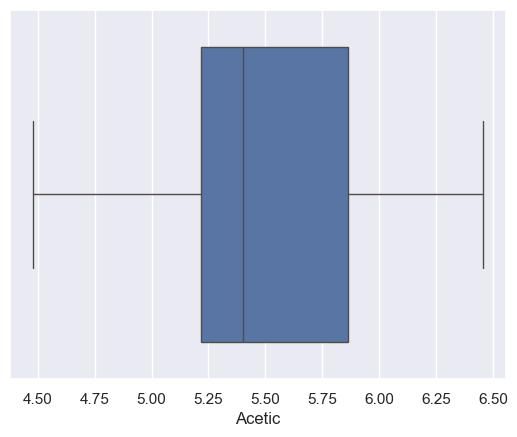

In [49]:
sns.boxplot(x=data_no_ol_m2['Acetic'])
plt.show()

### Method 3: Remove values using a Z-score

Activity: Look up the internet and write a piece of code to carry out outlier removal using the Z-score method. This link gives you a nice overview of both the Z-score method as well as the Interquartile rule: https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32


In [50]:
data_pp = data_no_ol_m2.copy()
data_pp

,Acetic,Animal,H2S,Lactic,Taste
0,4.543,sheep,3.135,0.860000,12.30
1,5.159,sheep,5.043,1.530000,20.90
2,5.366,cow,5.438,1.570000,39.00
3,5.759,sheep,7.496,1.810000,47.90
4,4.663,cow,3.807,0.990000,5.60
5,5.697,goat,7.601,1.090000,25.90
6,5.892,cow,8.726,1.290000,37.30
7,6.078,cow,7.966,1.780000,21.90
8,4.898,sheep,3.850,1.290000,18.10
9,5.242,sheep,4.174,1.580000,21.00
